In [1]:
import pandas as pd
import numpy as np

import pytz
import astral as ast
from astral import LocationInfo
from astral.sun import sun
from datetime import datetime, timedelta, date

In [2]:
# read in with pandas
winter1 = pd.read_csv ('aqw20-21data.txt')
winter2 = pd.read_csv ('aqw21-22data.txt')
winter3 = pd.read_csv ('aqw22-23data.txt')

In [3]:
# rename columns
winter1 = winter1.rename(columns = {'valid': 'datetime', 'p01m': 'precip(mm)'})
winter2 = winter2.rename(columns = {'valid': 'datetime', 'p01m': 'precip(mm)'})
winter3 = winter3.rename(columns = {'valid': 'datetime', 'p01m': 'precip(mm)'})

# datetime format
winter1['datetime'] = pd.to_datetime(winter1['datetime'])
winter2['datetime'] = pd.to_datetime(winter2['datetime'])
winter3['datetime'] = pd.to_datetime(winter3['datetime'])

In [4]:
# mask out days without precipitation
codes = ['GR','GS','IC','PL','PY','RA','SG','SH','SN','SQ','TS','UP']

mask1 = winter1['wxcodes'].apply(lambda x: any(sub in x for sub in codes))
mask2 = winter2['wxcodes'].apply(lambda x: any(sub in x for sub in codes))
mask3 = winter3['wxcodes'].apply(lambda x: any(sub in x for sub in codes))

precip_days1 = winter1[mask1]
precip_days2 = winter2[mask2]
precip_days3 = winter3[mask3]

In [5]:
# replace Trace with 0.0001
precip_days1['precip(mm)'] = precip_days1['precip(mm)'].replace('T', 0.0001)
precip_days2['precip(mm)'] = precip_days2['precip(mm)'].replace('T', 0.0001)
precip_days3['precip(mm)'] = precip_days3['precip(mm)'].replace('T', 0.0001)

C:\Users\alyha\AppData\Local\Temp\ipykernel_1080\3060002225.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  precip_days1['precip(mm)'] = precip_days1['precip(mm)'].replace('T', 0.0001)
C:\Users\alyha\AppData\Local\Temp\ipykernel_1080\3060002225.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  precip_days2['precip(mm)'] = precip_days2['precip(mm)'].replace('T', 0.0001)
C:\Users\alyha\AppData\Local\Temp\ipykernel_1080\3060002225.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

In [6]:
# make sure numeric form
precip_days1['precip(mm)'] = pd.to_numeric(precip_days1['precip(mm)'])
precip_days2['precip(mm)'] = pd.to_numeric(precip_days2['precip(mm)'])
precip_days3['precip(mm)'] = pd.to_numeric(precip_days3['precip(mm)'])

C:\Users\alyha\AppData\Local\Temp\ipykernel_1080\2630444437.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  precip_days1['precip(mm)'] = pd.to_numeric(precip_days1['precip(mm)'])
C:\Users\alyha\AppData\Local\Temp\ipykernel_1080\2630444437.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  precip_days2['precip(mm)'] = pd.to_numeric(precip_days2['precip(mm)'])
C:\Users\alyha\AppData\Local\Temp\ipykernel_1080\2630444437.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

In [7]:
# eliminate special weather 
precip_days1 = precip_days1[precip_days1['datetime'].dt.minute == 52]
precip_days2 = precip_days2[precip_days2['datetime'].dt.minute == 52]
precip_days3 = precip_days3[precip_days3['datetime'].dt.minute == 52]

In [8]:
precip_days1.dtypes

station               object
datetime      datetime64[ns]
precip(mm)           float64
wxcodes               object
dtype: object

In [9]:
precip_days1['date'] = precip_days1['datetime'].dt.date

In [10]:
aqw = LocationInfo(
    'North Adams', 'Massachusetts', 
    latitude= 42.6970,
    longitude= -73.1649,
    timezone='America/Connecticut'
)

aqw

LocationInfo(name='North Adams', region='Massachusetts', timezone='America/Connecticut', latitude=42.697, longitude=-73.1649)

In [11]:
# create a date range (winter 1)
date_range1 = pd.date_range(start='2020-12-01', end='2021-2-28', tz='America/New_York')

# lists to store sunrise and sunset times
sunrise_times1 = []
sunset_times1 = []

# Calculate sunrise and sunset for each date
for date in date_range1:
    s = sun(aqw.observer, date=date)
    
    sunrise_times1.append(s['sunrise'])
    sunset_times1.append(s['sunset'])

# df with results
sun_times1 = pd.DataFrame({
    'datetime': date_range1.date,
    'sunrise': sunrise_times1,
    'sunset': sunset_times1
})

sun_times1['sunrise'] = pd.to_datetime(sun_times1['sunrise'])
sun_times1['sunset'] = pd.to_datetime(sun_times1['sunset'])

In [12]:
# create a date range (winter 2)
date_range2 = pd.date_range(start='2021-12-01', end='2022-2-28', tz='America/New_York')

# lists to store sunrise and sunset times
sunrise_times2 = []
sunset_times2 = []

# Calculate sunrise and sunset for each date
for date in date_range2:
    s = sun(aqw.observer, date=date)
    
    sunrise_times2.append(s['sunrise'])
    sunset_times2.append(s['sunset'])

# df with results
sun_times2 = pd.DataFrame({
    'datetime': date_range2.date,
    'sunrise': sunrise_times2,
    'sunset': sunset_times2
})

sun_times2['sunrise'] = pd.to_datetime(sun_times2['sunrise'])
sun_times2['sunset'] = pd.to_datetime(sun_times2['sunset'])

In [13]:
# create a date range (winter 3)
date_range3 = pd.date_range(start='2022-12-01', end='2023-2-28', tz='America/New_York')

# lists to store sunrise and sunset times
sunrise_times3 = []
sunset_times3 = []

# Calculate sunrise and sunset for each date
for date in date_range3:
    s = sun(aqw.observer, date=date)
    
    sunrise_times3.append(s['sunrise'])
    sunset_times3.append(s['sunset'])

# df with results
sun_times3 = pd.DataFrame({
    'datetime': date_range3.date,
    'sunrise': sunrise_times3,
    'sunset': sunset_times3
})

sun_times3['sunrise'] = pd.to_datetime(sun_times3['sunrise'])
sun_times3['sunset'] = pd.to_datetime(sun_times3['sunset'])

In [14]:
# add sunrise and sunset times (winter1)
sun_times1['sunrise'] = sun_times1['sunrise'].dt.strftime('%Y-%m-%d %H:%M:%S')
sun_times1['sunset'] = sun_times1['sunset'].dt.strftime('%Y-%m-%d %H:%M:%S')

sun_times1['date'] = sun_times1['datetime']
sun_times1 = sun_times1.drop(columns=['datetime'])

print(sun_times1)

                sunrise               sunset        date
0   2020-12-01 07:04:02  2020-12-01 16:19:34  2020-12-01
1   2020-12-02 07:05:06  2020-12-02 16:19:18  2020-12-02
2   2020-12-03 07:06:08  2020-12-03 16:19:05  2020-12-03
3   2020-12-04 07:07:09  2020-12-04 16:18:54  2020-12-04
4   2020-12-05 07:08:08  2020-12-05 16:18:45  2020-12-05
..                  ...                  ...         ...
85  2021-02-24 06:36:07  2021-02-24 17:36:06  2021-02-24
86  2021-02-25 06:34:32  2021-02-25 17:37:21  2021-02-25
87  2021-02-26 06:32:57  2021-02-26 17:38:36  2021-02-26
88  2021-02-27 06:31:21  2021-02-27 17:39:51  2021-02-27
89  2021-02-28 06:29:44  2021-02-28 17:41:05  2021-02-28

[90 rows x 3 columns]


In [15]:
# add sunrise and sunset times (winter2)

sun_times2['sunrise'] = sun_times2['sunrise'].dt.strftime('%Y-%m-%d %H:%M:%S')
sun_times2['sunset'] = sun_times2['sunset'].dt.strftime('%Y-%m-%d %H:%M:%S')

sun_times2['date'] = sun_times2['datetime']
sun_times2 = sun_times2.drop(columns=['datetime'])

print(sun_times2)

                sunrise               sunset        date
0   2021-12-01 07:03:47  2021-12-01 16:19:38  2021-12-01
1   2021-12-02 07:04:51  2021-12-02 16:19:22  2021-12-02
2   2021-12-03 07:05:53  2021-12-03 16:19:08  2021-12-03
3   2021-12-04 07:06:54  2021-12-04 16:18:56  2021-12-04
4   2021-12-05 07:07:54  2021-12-05 16:18:47  2021-12-05
..                  ...                  ...         ...
85  2022-02-24 06:36:29  2022-02-24 17:35:47  2022-02-24
86  2022-02-25 06:34:55  2022-02-25 17:37:03  2022-02-25
87  2022-02-26 06:33:20  2022-02-26 17:38:18  2022-02-26
88  2022-02-27 06:31:44  2022-02-27 17:39:33  2022-02-27
89  2022-02-28 06:30:08  2022-02-28 17:40:47  2022-02-28

[90 rows x 3 columns]


In [16]:
# add sunrise and sunset times (winter3)

sun_times3['sunrise'] = sun_times3['sunrise'].dt.strftime('%Y-%m-%d %H:%M:%S')
sun_times3['sunset'] = sun_times3['sunset'].dt.strftime('%Y-%m-%d %H:%M:%S')

sun_times3['date'] = sun_times3['datetime']
sun_times3 = sun_times3.drop(columns=['datetime'])

print(sun_times3)

                sunrise               sunset        date
0   2022-12-01 07:03:31  2022-12-01 16:19:42  2022-12-01
1   2022-12-02 07:04:35  2022-12-02 16:19:25  2022-12-02
2   2022-12-03 07:05:38  2022-12-03 16:19:10  2022-12-03
3   2022-12-04 07:06:40  2022-12-04 16:18:58  2022-12-04
4   2022-12-05 07:07:40  2022-12-05 16:18:48  2022-12-05
..                  ...                  ...         ...
85  2023-02-24 06:36:52  2023-02-24 17:35:29  2023-02-24
86  2023-02-25 06:35:18  2023-02-25 17:36:45  2023-02-25
87  2023-02-26 06:33:43  2023-02-26 17:38:00  2023-02-26
88  2023-02-27 06:32:08  2023-02-27 17:39:15  2023-02-27
89  2023-02-28 06:30:31  2023-02-28 17:40:29  2023-02-28

[90 rows x 3 columns]


In [17]:
# add 'date' column to all dataframes
precip_days1['date'] = precip_days1['datetime'].dt.date
precip_days2['date'] = precip_days2['datetime'].dt.date
precip_days3['date'] = precip_days3['datetime'].dt.date

In [18]:
# merge precip days and sunrise/sunset times on date 
merged1 = pd.merge(precip_days1, sun_times1, on='date')

merged1

,station,datetime,precip(mm),wxcodes,date,sunrise,sunset
0,AQW,2020-12-01 00:52:00,4.5700,-RA,2020-12-01,2020-12-01 07:04:02,2020-12-01 16:19:34
1,AQW,2020-12-01 03:52:00,0.5100,-RA,2020-12-01,2020-12-01 07:04:02,2020-12-01 16:19:34
2,AQW,2020-12-01 15:52:00,0.2500,-RA,2020-12-01,2020-12-01 07:04:02,2020-12-01 16:19:34
3,AQW,2020-12-02 16:52:00,0.0001,-SN,2020-12-02,2020-12-02 07:05:06,2020-12-02 16:19:18
4,AQW,2020-12-02 18:52:00,0.0001,-SN,2020-12-02,2020-12-02 07:05:06,2020-12-02 16:19:18
...,...,...,...,...,...,...,...
297,AQW,2021-02-27 11:52:00,0.0001,-SN,2021-02-27,2021-02-27 06:31:21,2021-02-27 17:39:51
298,AQW,2021-02-27 12:52:00,0.2500,-SN,2021-02-27,2021-02-27 06:31:21,2021-02-27 17:39:51
299,AQW,2021-02-27 13:52:00,0.0001,UP,2021-02-27,2021-02-27 06:31:21,2021-02-27 17:39:51
300,AQW,2021-02-27 15:52:00,0.2500,-RA,2021-02-27,2021-02-27 06:31:21,2021-02-27 17:39:51


In [19]:
# merge precip days and sunrise/sunset times on date 
merged2 = pd.merge(precip_days2, sun_times2, on='date')

merged2

,station,datetime,precip(mm),wxcodes,date,sunrise,sunset
0,AQW,2021-12-01 04:52:00,0.0001,-SN,2021-12-01,2021-12-01 07:03:47,2021-12-01 16:19:38
1,AQW,2021-12-01 05:52:00,0.0001,-SN,2021-12-01,2021-12-01 07:03:47,2021-12-01 16:19:38
2,AQW,2021-12-01 06:52:00,0.0001,-SN,2021-12-01,2021-12-01 07:03:47,2021-12-01 16:19:38
3,AQW,2021-12-02 06:52:00,0.0001,-SN BR,2021-12-02,2021-12-02 07:04:51,2021-12-02 16:19:22
4,AQW,2021-12-02 07:52:00,0.5100,-SN BR,2021-12-02,2021-12-02 07:04:51,2021-12-02 16:19:22
...,...,...,...,...,...,...,...
262,AQW,2022-02-25 22:52:00,0.0001,-SN,2022-02-25,2022-02-25 06:34:55,2022-02-25 17:37:03
263,AQW,2022-02-26 00:52:00,0.0001,-SN,2022-02-26,2022-02-26 06:33:20,2022-02-26 17:38:18
264,AQW,2022-02-26 01:52:00,0.0001,-SN,2022-02-26,2022-02-26 06:33:20,2022-02-26 17:38:18
265,AQW,2022-02-26 04:52:00,0.0001,-SN,2022-02-26,2022-02-26 06:33:20,2022-02-26 17:38:18


In [20]:
# merge precip days and sunrise/sunset times on date 
merged3 = pd.merge(precip_days3, sun_times3, on='date')

merged3

,station,datetime,precip(mm),wxcodes,date,sunrise,sunset
0,AQW,2022-12-01 00:52:00,0.0001,-RA,2022-12-01,2022-12-01 07:03:31,2022-12-01 16:19:42
1,AQW,2022-12-01 20:52:00,0.0001,-SN,2022-12-01,2022-12-01 07:03:31,2022-12-01 16:19:42
2,AQW,2022-12-01 21:52:00,0.0001,-SN,2022-12-01,2022-12-01 07:03:31,2022-12-01 16:19:42
3,AQW,2022-12-03 05:52:00,0.0001,-RA,2022-12-03,2022-12-03 07:05:38,2022-12-03 16:19:10
4,AQW,2022-12-03 11:52:00,0.0001,-RA,2022-12-03,2022-12-03 07:05:38,2022-12-03 16:19:10
...,...,...,...,...,...,...,...
293,AQW,2023-02-25 23:52:00,0.0001,-SN BR,2023-02-25,2023-02-25 06:35:18,2023-02-25 17:36:45
294,AQW,2023-02-26 00:52:00,0.0001,-SN BR,2023-02-26,2023-02-26 06:33:43,2023-02-26 17:38:00
295,AQW,2023-02-26 17:52:00,0.0001,-SN,2023-02-26,2023-02-26 06:33:43,2023-02-26 17:38:00
296,AQW,2023-02-26 18:52:00,0.0001,-SN,2023-02-26,2023-02-26 06:33:43,2023-02-26 17:38:00


In [21]:
# filter out only times after sunrise & before sunset 

days1 = merged1[(merged1['datetime'] >= merged1['sunrise']) & (merged1['datetime'] <= merged1['sunset'])]
days2 = merged2[(merged2['datetime'] >= merged2['sunrise']) & (merged2['datetime'] <= merged2['sunset'])]
days3 = merged3[(merged3['datetime'] >= merged3['sunrise']) & (merged3['datetime'] <= merged3['sunset'])]


days1

,station,datetime,precip(mm),wxcodes,date,sunrise,sunset
2,AQW,2020-12-01 15:52:00,0.2500,-RA,2020-12-01,2020-12-01 07:04:02,2020-12-01 16:19:34
7,AQW,2020-12-05 11:52:00,0.2500,-RA,2020-12-05,2020-12-05 07:08:08,2020-12-05 16:18:45
8,AQW,2020-12-05 12:52:00,0.5100,-RA,2020-12-05,2020-12-05 07:08:08,2020-12-05 16:18:45
9,AQW,2020-12-05 13:52:00,1.0200,-RA BR,2020-12-05,2020-12-05 07:08:08,2020-12-05 16:18:45
10,AQW,2020-12-05 14:52:00,0.2500,-RA,2020-12-05,2020-12-05 07:08:08,2020-12-05 16:18:45
...,...,...,...,...,...,...,...
297,AQW,2021-02-27 11:52:00,0.0001,-SN,2021-02-27,2021-02-27 06:31:21,2021-02-27 17:39:51
298,AQW,2021-02-27 12:52:00,0.2500,-SN,2021-02-27,2021-02-27 06:31:21,2021-02-27 17:39:51
299,AQW,2021-02-27 13:52:00,0.0001,UP,2021-02-27,2021-02-27 06:31:21,2021-02-27 17:39:51
300,AQW,2021-02-27 15:52:00,0.2500,-RA,2021-02-27,2021-02-27 06:31:21,2021-02-27 17:39:51


In [22]:
# filter out transition hours
days1['sunrise'] = pd.to_datetime(days1['sunrise'])
days1['sunset'] = pd.to_datetime(days1['sunset'])

days1['sunrise+1'] = days1['sunrise'] + timedelta(hours = 1)
days1['sunset-1'] = days1['sunset'] - timedelta(hours = 1)

days1 = days1[days1['datetime'] <= days1['sunset-1']]
days1 = days1[days1['datetime'] >= days1['sunrise+1']]



days2['sunrise'] = pd.to_datetime(days2['sunrise'])
days2['sunset'] = pd.to_datetime(days2['sunset'])

days2['sunrise+1'] = days2['sunrise'] + timedelta(hours = 1)
days2['sunset-1'] = days2['sunset'] - timedelta(hours = 1)

days2 = days2[days2['datetime'] <= days2['sunset-1']]
days2 = days2[days2['datetime'] >= days2['sunrise+1']]



days3['sunrise'] = pd.to_datetime(days3['sunrise'])
days3['sunset'] = pd.to_datetime(days3['sunset'])

days3['sunrise+1'] = days3['sunrise'] + timedelta(hours = 1)
days3['sunset-1'] = days3['sunset'] - timedelta(hours = 1)

days3 = days3[days3['datetime'] <= days3['sunset-1']]
days3 = days3[days3['datetime'] >= days3['sunrise+1']]

C:\Users\alyha\AppData\Local\Temp\ipykernel_1080\2882998222.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  days1['sunrise'] = pd.to_datetime(days1['sunrise'])
C:\Users\alyha\AppData\Local\Temp\ipykernel_1080\2882998222.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  days1['sunset'] = pd.to_datetime(days1['sunset'])
C:\Users\alyha\AppData\Local\Temp\ipykernel_1080\2882998222.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

In [23]:
days1

,station,datetime,precip(mm),wxcodes,date,sunrise,sunset,sunrise+1,sunset-1
7,AQW,2020-12-05 11:52:00,0.2500,-RA,2020-12-05,2020-12-05 07:08:08,2020-12-05 16:18:45,2020-12-05 08:08:08,2020-12-05 15:18:45
8,AQW,2020-12-05 12:52:00,0.5100,-RA,2020-12-05,2020-12-05 07:08:08,2020-12-05 16:18:45,2020-12-05 08:08:08,2020-12-05 15:18:45
9,AQW,2020-12-05 13:52:00,1.0200,-RA BR,2020-12-05,2020-12-05 07:08:08,2020-12-05 16:18:45,2020-12-05 08:08:08,2020-12-05 15:18:45
10,AQW,2020-12-05 14:52:00,0.2500,-RA,2020-12-05,2020-12-05 07:08:08,2020-12-05 16:18:45,2020-12-05 08:08:08,2020-12-05 15:18:45
19,AQW,2020-12-08 13:52:00,0.0001,-SN,2020-12-08,2020-12-08 07:10:58,2020-12-08 16:18:34,2020-12-08 08:10:58,2020-12-08 15:18:34
...,...,...,...,...,...,...,...,...,...
296,AQW,2021-02-27 10:52:00,0.2500,-SN BR,2021-02-27,2021-02-27 06:31:21,2021-02-27 17:39:51,2021-02-27 07:31:21,2021-02-27 16:39:51
297,AQW,2021-02-27 11:52:00,0.0001,-SN,2021-02-27,2021-02-27 06:31:21,2021-02-27 17:39:51,2021-02-27 07:31:21,2021-02-27 16:39:51
298,AQW,2021-02-27 12:52:00,0.2500,-SN,2021-02-27,2021-02-27 06:31:21,2021-02-27 17:39:51,2021-02-27 07:31:21,2021-02-27 16:39:51
299,AQW,2021-02-27 13:52:00,0.0001,UP,2021-02-27,2021-02-27 06:31:21,2021-02-27 17:39:51,2021-02-27 07:31:21,2021-02-27 16:39:51


In [24]:
# find total precip over each year
day_total1 = days1['precip(mm)'].sum()
day_total2 = days2['precip(mm)'].sum()
day_total3 = days3['precip(mm)'].sum()

# total number of obs each year
day_rows1 = days1.shape[0]
day_rows2 = days2.shape[0]
day_rows3 = days3.shape[0]

In [25]:
day_precip_per_hour1 = day_total1/ day_rows1
day_precip_per_hour2 = day_total2/ day_rows2
day_precip_per_hour3 = day_total3/ day_rows3

In [26]:
print('2020-2021:', day_precip_per_hour1)
print('2021-2022:', day_precip_per_hour2)
print('2022-2023:', day_precip_per_hour3)

2020-2021: 0.7641676470588235
2021-2022: 0.6810632653061224
2022-2023: 0.6236430555555555


In [27]:
# filter out only times after sunset & before NEXT sunrise 

nights1 = merged1[(merged1['datetime'] < merged1['sunrise']) | (merged1['datetime'] > merged1['sunset'])]
nights2 = merged2[(merged2['datetime'] < merged2['sunrise']) | (merged2['datetime'] > merged2['sunset'])]
nights3 = merged3[(merged3['datetime'] < merged3['sunrise']) | (merged3['datetime'] > merged3['sunset'])]

nights1

,station,datetime,precip(mm),wxcodes,date,sunrise,sunset
0,AQW,2020-12-01 00:52:00,4.5700,-RA,2020-12-01,2020-12-01 07:04:02,2020-12-01 16:19:34
1,AQW,2020-12-01 03:52:00,0.5100,-RA,2020-12-01,2020-12-01 07:04:02,2020-12-01 16:19:34
3,AQW,2020-12-02 16:52:00,0.0001,-SN,2020-12-02,2020-12-02 07:05:06,2020-12-02 16:19:18
4,AQW,2020-12-02 18:52:00,0.0001,-SN,2020-12-02,2020-12-02 07:05:06,2020-12-02 16:19:18
5,AQW,2020-12-02 19:52:00,0.0001,-SN,2020-12-02,2020-12-02 07:05:06,2020-12-02 16:19:18
...,...,...,...,...,...,...,...
289,AQW,2021-02-22 19:52:00,0.0001,-SN,2021-02-22,2021-02-22 06:39:12,2021-02-22 17:33:34
290,AQW,2021-02-22 20:52:00,0.7600,SN FG,2021-02-22,2021-02-22 06:39:12,2021-02-22 17:33:34
291,AQW,2021-02-22 21:52:00,0.7600,-SN BR,2021-02-22,2021-02-22 06:39:12,2021-02-22 17:33:34
292,AQW,2021-02-22 22:52:00,0.7600,-SN BR,2021-02-22,2021-02-22 06:39:12,2021-02-22 17:33:34


In [28]:
# filter out transition hours
nights1['sunrise'] = pd.to_datetime(nights1['sunrise'])
nights1['sunset'] = pd.to_datetime(nights1['sunset'])

nights1['sunrise-1'] = nights1['sunrise'] - timedelta(hours = 1) + timedelta(days = 1)
nights1['sunset+1'] = nights1['sunset'] + timedelta(hours = 1)

nights1 = nights1[nights1['datetime'] >= nights1['sunset+1']]
nights1 = nights1[nights1['datetime'] <= nights1['sunrise-1']]



nights2['sunrise'] = pd.to_datetime(nights2['sunrise'])
nights2['sunset'] = pd.to_datetime(nights2['sunset'])

nights2['sunrise-1'] = nights2['sunrise'] - timedelta(hours = 1) + timedelta(days = 1)
nights2['sunset+1'] = nights2['sunset'] + timedelta(hours = 1)

nights2 = nights2[nights2['datetime'] >= nights2['sunset+1']]
nights2 = nights2[nights2['datetime'] <= nights2['sunrise-1']]



nights3['sunrise'] = pd.to_datetime(nights3['sunrise'])
nights3['sunset'] = pd.to_datetime(nights3['sunset'])

nights3['sunrise-1'] = nights3['sunrise'] - timedelta(hours = 1) + timedelta(days = 1)
nights3['sunset+1'] = nights3['sunset'] + timedelta(hours = 1)

nights3 = nights3[nights3['datetime'] >= nights3['sunset+1']]
nights3 = nights3[nights3['datetime'] <= nights3['sunrise-1']]


C:\Users\alyha\AppData\Local\Temp\ipykernel_1080\36922422.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nights1['sunrise'] = pd.to_datetime(nights1['sunrise'])
C:\Users\alyha\AppData\Local\Temp\ipykernel_1080\36922422.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nights1['sunset'] = pd.to_datetime(nights1['sunset'])
C:\Users\alyha\AppData\Local\Temp\ipykernel_1080\36922422.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

In [29]:
# find total precip over each year
night_total1 = nights1['precip(mm)'].sum()
night_total2 = nights2['precip(mm)'].sum()
night_total3 = nights3['precip(mm)'].sum()

# total number of obs each year
night_rows1 = nights1.shape[0]
night_rows2 = nights2.shape[0]
night_rows3 = nights3.shape[0]

In [30]:
night_precip_per_hour1 = night_total1/ night_rows1
night_precip_per_hour2 = night_total2/ night_rows2
night_precip_per_hour3 = night_total3/ night_rows3

In [31]:
print('2020-2021:', night_precip_per_hour1)
print('2021-2022:', night_precip_per_hour2)
print('2022-2023:', night_precip_per_hour3)

2020-2021: 0.25087674418604655
2021-2022: 0.39513606557377046
2022-2023: 0.4589761904761905


In [32]:
nights1['hour'] = (nights1['datetime'].dt.hour +1)

In [33]:
nights1

,station,datetime,precip(mm),wxcodes,date,sunrise,sunset,sunrise-1,sunset+1,hour
4,AQW,2020-12-02 18:52:00,0.0001,-SN,2020-12-02,2020-12-02 07:05:06,2020-12-02 16:19:18,2020-12-03 06:05:06,2020-12-02 17:19:18,19
5,AQW,2020-12-02 19:52:00,0.0001,-SN,2020-12-02,2020-12-02 07:05:06,2020-12-02 16:19:18,2020-12-03 06:05:06,2020-12-02 17:19:18,20
6,AQW,2020-12-02 22:52:00,0.0001,-SN,2020-12-02,2020-12-02 07:05:06,2020-12-02 16:19:18,2020-12-03 06:05:06,2020-12-02 17:19:18,23
13,AQW,2020-12-05 17:52:00,1.0200,-RA BR,2020-12-05,2020-12-05 07:08:08,2020-12-05 16:18:45,2020-12-06 06:08:08,2020-12-05 17:18:45,18
14,AQW,2020-12-05 18:52:00,1.0200,-SN BR,2020-12-05,2020-12-05 07:08:08,2020-12-05 16:18:45,2020-12-06 06:08:08,2020-12-05 17:18:45,19
...,...,...,...,...,...,...,...,...,...,...
289,AQW,2021-02-22 19:52:00,0.0001,-SN,2021-02-22,2021-02-22 06:39:12,2021-02-22 17:33:34,2021-02-23 05:39:12,2021-02-22 18:33:34,20
290,AQW,2021-02-22 20:52:00,0.7600,SN FG,2021-02-22,2021-02-22 06:39:12,2021-02-22 17:33:34,2021-02-23 05:39:12,2021-02-22 18:33:34,21
291,AQW,2021-02-22 21:52:00,0.7600,-SN BR,2021-02-22,2021-02-22 06:39:12,2021-02-22 17:33:34,2021-02-23 05:39:12,2021-02-22 18:33:34,22
292,AQW,2021-02-22 22:52:00,0.7600,-SN BR,2021-02-22,2021-02-22 06:39:12,2021-02-22 17:33:34,2021-02-23 05:39:12,2021-02-22 18:33:34,23


<Axes: title={'center': 'precip(mm)'}, xlabel='[hour]'>

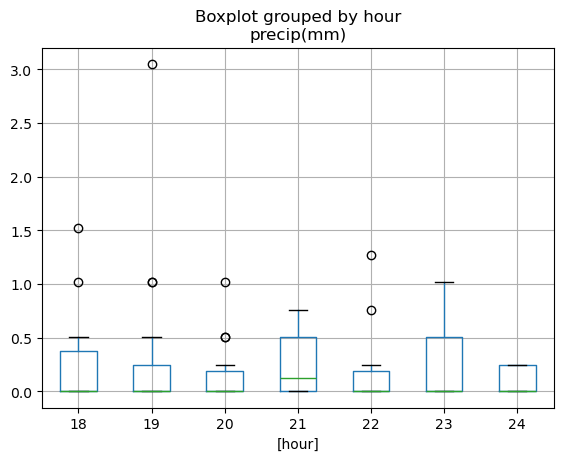

In [34]:
import matplotlib as plt

nights1.boxplot( by = 'hour')

In [70]:
data = pd.concat([days1, nights1, days2, nights2, days3, nights3])

data['date'] = pd.to_datetime(data['date'])
data['month'] = data['date'].dt.month

data['state'] = 'MA'

data.to_csv('aqw.csv', index=False)